# Assignment 3: Clustering

Szymon Siemieniuk 151947

Nikita Makarevich 153989

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.utils.random import sample_without_replacement
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_data = pd.read_csv('data/data.csv')
RANDOM_STATE = 420

In [174]:
df_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [175]:
df_data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [176]:
cat_features = [
    'f_07',
    'f_08',
    'f_09',
    'f_10',
    'f_11',
    'f_12',
    'f_13'
]
df_cat = df_data[cat_features]

num_features = list(set(df_data.columns) - set(cat_features) - set('id'))
df_num = df_data[num_features]

columns = num_features
columns.extend(cat_features)

df_data = df_data[columns]

In [177]:
df_cat.describe()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,5.545918,6.763061,8.193163,8.057878,8.084990,7.076388,6.286102
std,3.691840,4.152348,5.904919,4.700226,4.197106,4.433308,4.120077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000
50%,5.000000,6.000000,7.000000,7.000000,8.000000,6.000000,6.000000
75%,8.000000,9.000000,11.000000,11.000000,11.000000,10.000000,9.000000
max,32.000000,30.000000,44.000000,36.000000,28.000000,38.000000,30.000000


### Data Preprocessing

We change both categorical and numerical attributes to the same scale, since initially their scales are very different. Also K-means tends to prefer circular (not elongated) clusters, so we reduce the risk by transforming the space accordingly.

In [178]:
num_schema = StandardScaler().fit(df_num)
cat_schema = StandardScaler().fit(df_cat)
# cat_schema = OneHotEncoder().fit(df_cat)
# cat_schema = None


df_scaled = pd.DataFrame(num_schema.transform(df_num), columns=df_num.columns)

if isinstance(cat_schema, OneHotEncoder):
    new_df_cat = pd.DataFrame(cat_schema.transform(df_cat).todense(), columns=cat_schema.get_feature_names_out())
    df_scaled = pd.concat([df_scaled, new_df_cat], axis=1)
elif cat_schema is None: 
    df_scaled[df_cat.columns] = df_cat
else:
    df_scaled[df_cat.columns] = cat_schema.transform(df_cat)

df_scaled.drop(columns=['id'], inplace=True)

In [179]:
df_scaled.head()

,f_05,f_20,f_04,f_28,f_18,f_26,f_27,f_06,f_19,f_21,...,f_03,f_14,f_16,f_07,f_08,f_09,f_10,f_11,f_12,f_13
0,0.734849,-0.754257,-0.824775,0.683323,-0.362972,0.960482,1.045296,2.267432,-0.471839,-0.762195,...,0.589499,-0.473738,1.059236,-0.960479,1.502035,0.983395,-0.650584,1.171053,-0.242797,-0.069441
1,0.864967,-0.089129,-1.644472,-1.602671,0.478499,-0.552942,0.355435,-0.087835,-0.422434,-1.783073,...,0.995533,0.588248,0.139972,-0.960479,-0.906254,-0.371415,-0.863341,-0.496771,2.012866,0.658704
2,0.785146,-1.597140,0.108638,-2.224327,0.298074,0.979171,-0.926250,1.996476,-0.407243,1.193015,...,-0.623531,-0.684017,0.343316,-0.147872,1.020377,-0.540766,-0.012314,0.218011,-0.919496,1.144134
3,-1.219016,1.284518,0.417259,0.307002,-1.150052,-0.397908,-0.114228,0.142257,0.621083,0.534669,...,0.232124,-0.393288,-1.076425,0.122997,-1.147082,0.814044,-0.012314,0.218011,-0.242797,-0.554872
4,-1.850223,-0.433152,-0.285713,-1.149094,0.435485,1.166086,-0.385886,0.786963,-1.617255,0.324273,...,-1.828801,-0.124288,-1.066274,0.664735,0.057062,-0.540766,-1.076098,-1.688074,1.336167,1.144134


Text(0, 0.5, 'Cumulative explained variance')

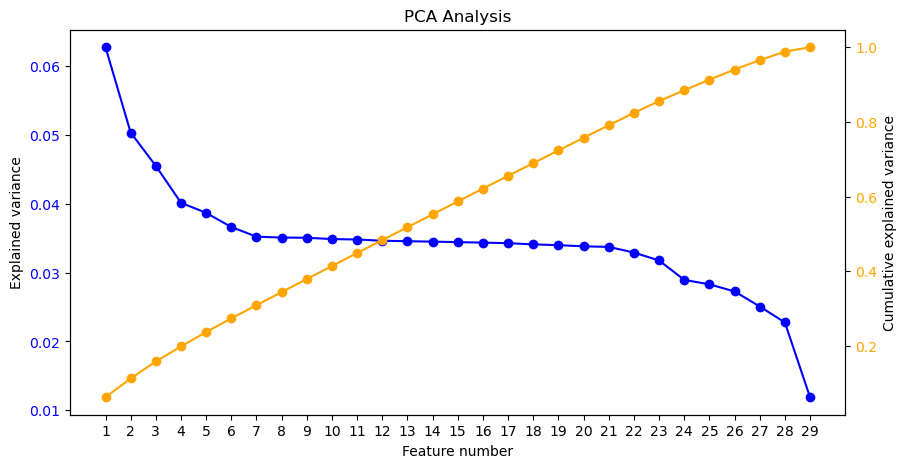

In [186]:
max_components = 29
pca = PCA(n_components=max_components, random_state=RANDOM_STATE)
pca.fit(df_scaled)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
x_vals = range(1, max_components+1)
y_vals = pca.explained_variance_ratio_

color1="blue"
ax1.plot(x_vals, y_vals, c=color1)
ax1.scatter(x_vals, y_vals, c=color1)
ax1.set_xticks(x_vals)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel("Feature number")
ax1.set_ylabel("Explained variance")
ax1.set_title("PCA Analysis")

ax2 = ax1.twinx()

color2 = "orange"
ax2.plot(x_vals, np.cumsum(y_vals), c=color2)
ax2.scatter(x_vals, np.cumsum(y_vals), c=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel("Cumulative explained variance")

As we can see from the plot above, the features explain more or less the same variance, so we choose not to reduce the number of features (since we can't necessarily tell which ones are more informative)

In [76]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.690049,-0.065806,-1.152288,1.647112,1.049714,0.184268,0.122812,2.464091,-0.334974,1.365643
1,-0.962431,-0.926917,2.158420,-1.095303,-0.171867,-1.309496,0.237459,0.215473,1.332048,0.782343
2,-1.375477,0.695580,-1.117810,-0.932218,-0.286526,-0.266661,-0.075233,2.043526,-0.722874,0.470877
3,1.185497,0.147776,0.376840,-0.841213,0.574698,0.044402,-0.043146,-0.664526,-1.378243,-0.018358
4,-1.133003,-0.096996,1.399141,-2.320533,-0.824014,-0.075635,1.721909,-0.204940,-0.895963,-1.222530


In [25]:
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9
count,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04
mean,2.378143e-17,1.798108e-17,1.395709e-17,-3.429456e-17,2.465148e-18,2.146129e-17,-2.639159e-17,-1.392084e-17,-3.074185e-17,-1.424711e-17
std,1.348207e+00,1.207094e+00,1.141475e+00,1.061856e+00,1.049975e+00,1.022515e+00,1.008692e+00,1.003490e+00,1.001400e+00,1.000479e+00
min,-4.515005e+00,-5.251224e+00,-4.773852e+00,-4.594085e+00,-4.157578e+00,-4.236045e+00,-4.568747e+00,-4.437919e+00,-4.559059e+00,-3.954707e+00
25%,-9.152809e-01,-8.192529e-01,-7.800443e-01,-7.164679e-01,-7.139119e-01,-6.955284e-01,-6.787344e-01,-6.760083e-01,-6.748498e-01,-6.743864e-01
50%,-1.651001e-01,9.012007e-03,-1.230630e-02,-1.244448e-02,-7.563406e-03,-2.191989e-02,-4.365459e-04,-1.113340e-03,2.788644e-03,-8.623756e-04
75%,7.823614e-01,8.325670e-01,7.687895e-01,7.105360e-01,6.997973e-01,6.826153e-01,6.795717e-01,6.757028e-01,6.746576e-01,6.744113e-01
max,5.967965e+00,5.304363e+00,5.479649e+00,4.972896e+00,4.418742e+00,4.935267e+00,4.673805e+00,4.460455e+00,4.757774e+00,4.216194e+00


In [201]:
SAMPLE_SIZE = 10000

silhouette_scores = []
bouldin_scores = []
ns_clusters = list(range(2, 21, 1))

for n_clusters in ns_clusters:
    print(f"Computing for n_clusters: {n_clusters}")
    indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
    sampled_df_scaled = df_scaled.iloc[indices]

    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init="auto", verbose=False)
    kmeans.fit(sampled_df_scaled)

    labels = kmeans.predict(sampled_df_scaled)
    silhouette_scores.append(silhouette_score(sampled_df_scaled, labels))
    bouldin_scores.append(davies_bouldin_score(sampled_df_scaled, labels))


Computing for n_clusters: 2
Computing for n_clusters: 3
Computing for n_clusters: 4
Computing for n_clusters: 5
Computing for n_clusters: 6
Computing for n_clusters: 7
Computing for n_clusters: 8
Computing for n_clusters: 9
Computing for n_clusters: 10
Computing for n_clusters: 11
Computing for n_clusters: 12
Computing for n_clusters: 13
Computing for n_clusters: 14
Computing for n_clusters: 15
Computing for n_clusters: 16
Computing for n_clusters: 17
Computing for n_clusters: 18
Computing for n_clusters: 19
Computing for n_clusters: 20


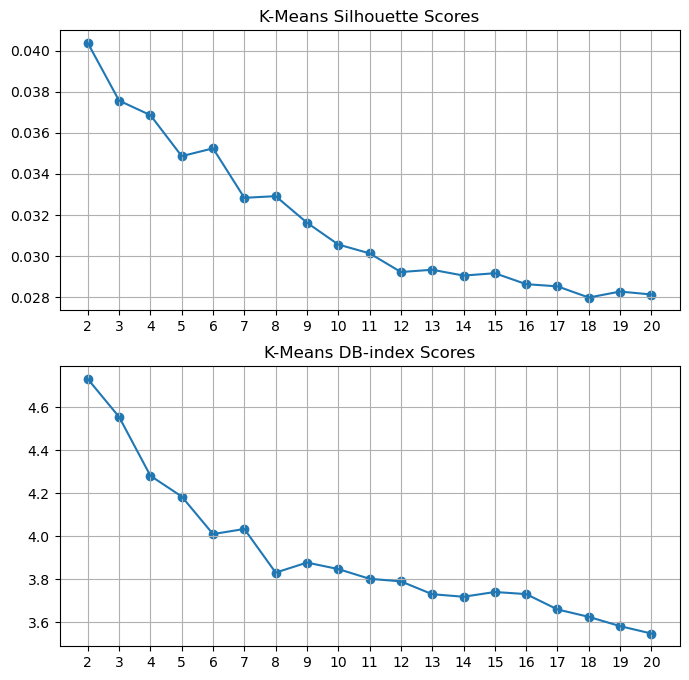

In [202]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(ns_clusters, silhouette_scores)
axs[0].scatter(ns_clusters, silhouette_scores)
axs[0].set_title("K-Means Silhouette Scores")
axs[0].set_xticks(ns_clusters)
axs[0].grid()

axs[1].plot(ns_clusters, bouldin_scores)
axs[1].scatter(ns_clusters, bouldin_scores)
axs[1].set_title("K-Means DB-index Scores")
axs[1].set_xticks(ns_clusters)
axs[1].grid()

plt.show()

In [260]:
kmeans_ns = list(range(2, 9))
kmeans_names = [f"k={k}" for k in kmeans_ns]
kmeans_labels = []
for n_clusters in kmeans_ns:
    # indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
    # sampled_df_scaled = df_scaled.iloc[indices]

    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init="auto", verbose=False)
    kmeans.fit(df_scaled)

    labels = kmeans.predict(df_scaled)
    kmeans_labels.append(labels)

Unfortunately, when it comes to DBSCAN - no matter what parameters (eps & min_samples) we chose, it resulted in very poor clustering:
- either all examples labeled as _outliers_
- or all examples labeld as _one cluster_
- or one gigantic cluster with 99% of data, and lots of small ones of size < 10

In [261]:
dbscan_epsilons = [2.8, 3.7, 5.0]
dbscan_min_samples = [5, 7, 4]
dbscan_names = [f"eps={eps}, minsamp={min_samples}" for eps, min_samples in zip(dbscan_epsilons, dbscan_min_samples)]
dbscan_labels = []
for i, (eps, min_samples) in enumerate(zip(dbscan_epsilons, dbscan_min_samples)):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)
    dbscan_labels.append(labels)

## Cluster visualization

Since, as shown previously, PCA is more or less useless, we will be using a different visualization - __TSNE__

In [277]:
def plot_clusters(X, labels_list, n_components=2, model_names=None, sample_size=5000):
    m = int(np.sqrt(len(labels_list)))
    n = int(np.ceil(len(labels_list) / m))
    fig, axs = plt.subplots(m, n, figsize=(5*n, 5*m))
    axs = np.reshape(axs, newshape=(m, n))
    
    if sample_size is not None:
        sample_inds = sample_without_replacement(len(X), sample_size)
        X = X.iloc[sample_inds, :]

    labels_list = list(labels_list)
    labels_list += [None]*(m*n-len(labels_list))
    labels_list = np.array(labels_list, dtype=object)
    labels_list = np.reshape(labels_list, newshape=(m, n))

    pca = TSNE(n_components=n_components)
    X_new = pca.fit_transform(X)
    for i in range(m):
        for j in range(n):
            labels = labels_list[i, j]
            ax = axs[i, j]
            
            if labels is None:
                ax.set_axis_off()
                continue

            scatter = ax.scatter(x=X_new[:, 0], y=X_new[:, 1], c=labels[sample_inds], alpha=0.5)
            if model_names is not None:
                ax.set_title(model_names[n*i+j])
            ax.legend(*scatter.legend_elements(), title="Clusters")

def plot_cluster_distances_heatmap(X, labels_list, dist_metrics_list, model_names=None):
    m, n = len(labels_list), len(dist_metrics_list)
    fig, axs = plt.subplots(m, n, figsize=(2*n, 2*m))
    axs = np.reshape(axs, newshape=(len(labels_list), len(dist_metrics_list))

    for plot_i, labels in enumerate(labels_list):
        for plot_j, dist_metric in enumerate(dist_metrics_list):
            unique_labels = np.unique(labels)
            n_clusters = len(unique_labels)

            dist_matrix = np.zeros(shape=(n_clusters, n_clusters))

            for i, label1 in enumerate(unique_labels):
                for j, label2 in enumerate(unique_labels):
                    if i > j:
                        dist_matrix[i, j] = dist_matrix[j, i]
                        continue

                    dist_matrix[i, j] = dist_metric(X[labels==label1], X[labels==label2])

            sns.heatmap(dist_matrix, xticklabels=unique_labels, yticklabels=unique_labels, ax=axs[plot_i, plot_j])

            
            if plot_i == 0:
                axs[plot_i, plot_j].set_title(dist_metric.__name__)
            if model_names is not None and plot_j == 0:
                axs[plot_i, plot_j].set_ylabel(model_names[plot_i])

To inspect numerically the results of clusterization, we will use several distance metrics - visualized on the heatmaps below

In [280]:
def euclidean_distance_between_centroids(X1: pd.DataFrame, X2: pd.DataFrame):
    centroid1, centroid2 = X1.mean(axis=0), X2.mean(axis=0)
    result = np.linalg.norm(centroid1-centroid2)
    return result

def euclidean_distance_avg(X1: pd.DataFrame, X2: pd.DataFrame, sample_size=10):
    X1_sample_inds = sample_without_replacement(len(X1), sample_size) if sample_size < len(X1) else X1.reset_index().index.to_numpy()
    X2_sample_inds = sample_without_replacement(len(X2), sample_size) if sample_size < len(X2) else X2.reset_index().index.to_numpy()
    dists = np.zeros(shape=(len(X1_sample_inds), len(X2_sample_inds)))
    for i, ind1 in enumerate(X1_sample_inds):
        for j, ind2 in enumerate(X2_sample_inds):
            dists[i, j] = np.linalg.norm(X1.iloc[ind1, :] - X2.iloc[ind2, :])

    return dists.mean()

def canberra_distance_avg(X1: pd.DataFrame, X2: pd.DataFrame, sample_size=10):
    X1_sample_inds = sample_without_replacement(len(X1), sample_size) if sample_size < len(X1) else X1.reset_index().index.to_numpy()
    X2_sample_inds = sample_without_replacement(len(X2), sample_size) if sample_size < len(X2) else X2.reset_index().index.to_numpy()
    dists = np.zeros(shape=(len(X1_sample_inds), len(X2_sample_inds)))
    for i, ind1 in enumerate(X1_sample_inds):
        for j, ind2 in enumerate(X2_sample_inds):
            row1, row2 = X1.iloc[ind1, :], X2.iloc[ind2, :]
            dists[i, j] = np.sum(np.abs(row1 - row2) / (np.abs(row1) + np.abs(row2)))
    return dists.mean()

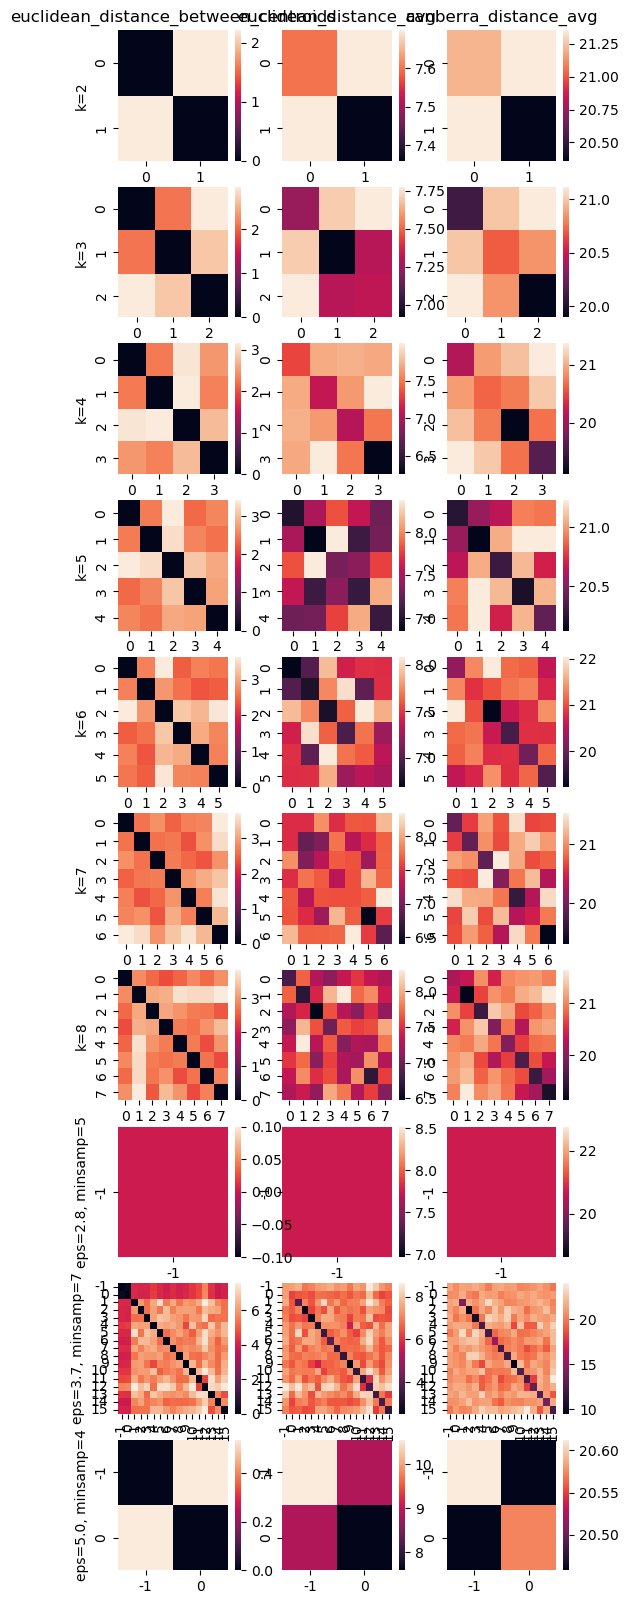

In [281]:
plot_cluster_distances_heatmap(
    df_scaled, 
    (kmeans_labels + dbscan_labels), 
    [euclidean_distance_between_centroids, euclidean_distance_avg, canberra_distance_avg], 
    model_names=(kmeans_names+dbscan_names)
)

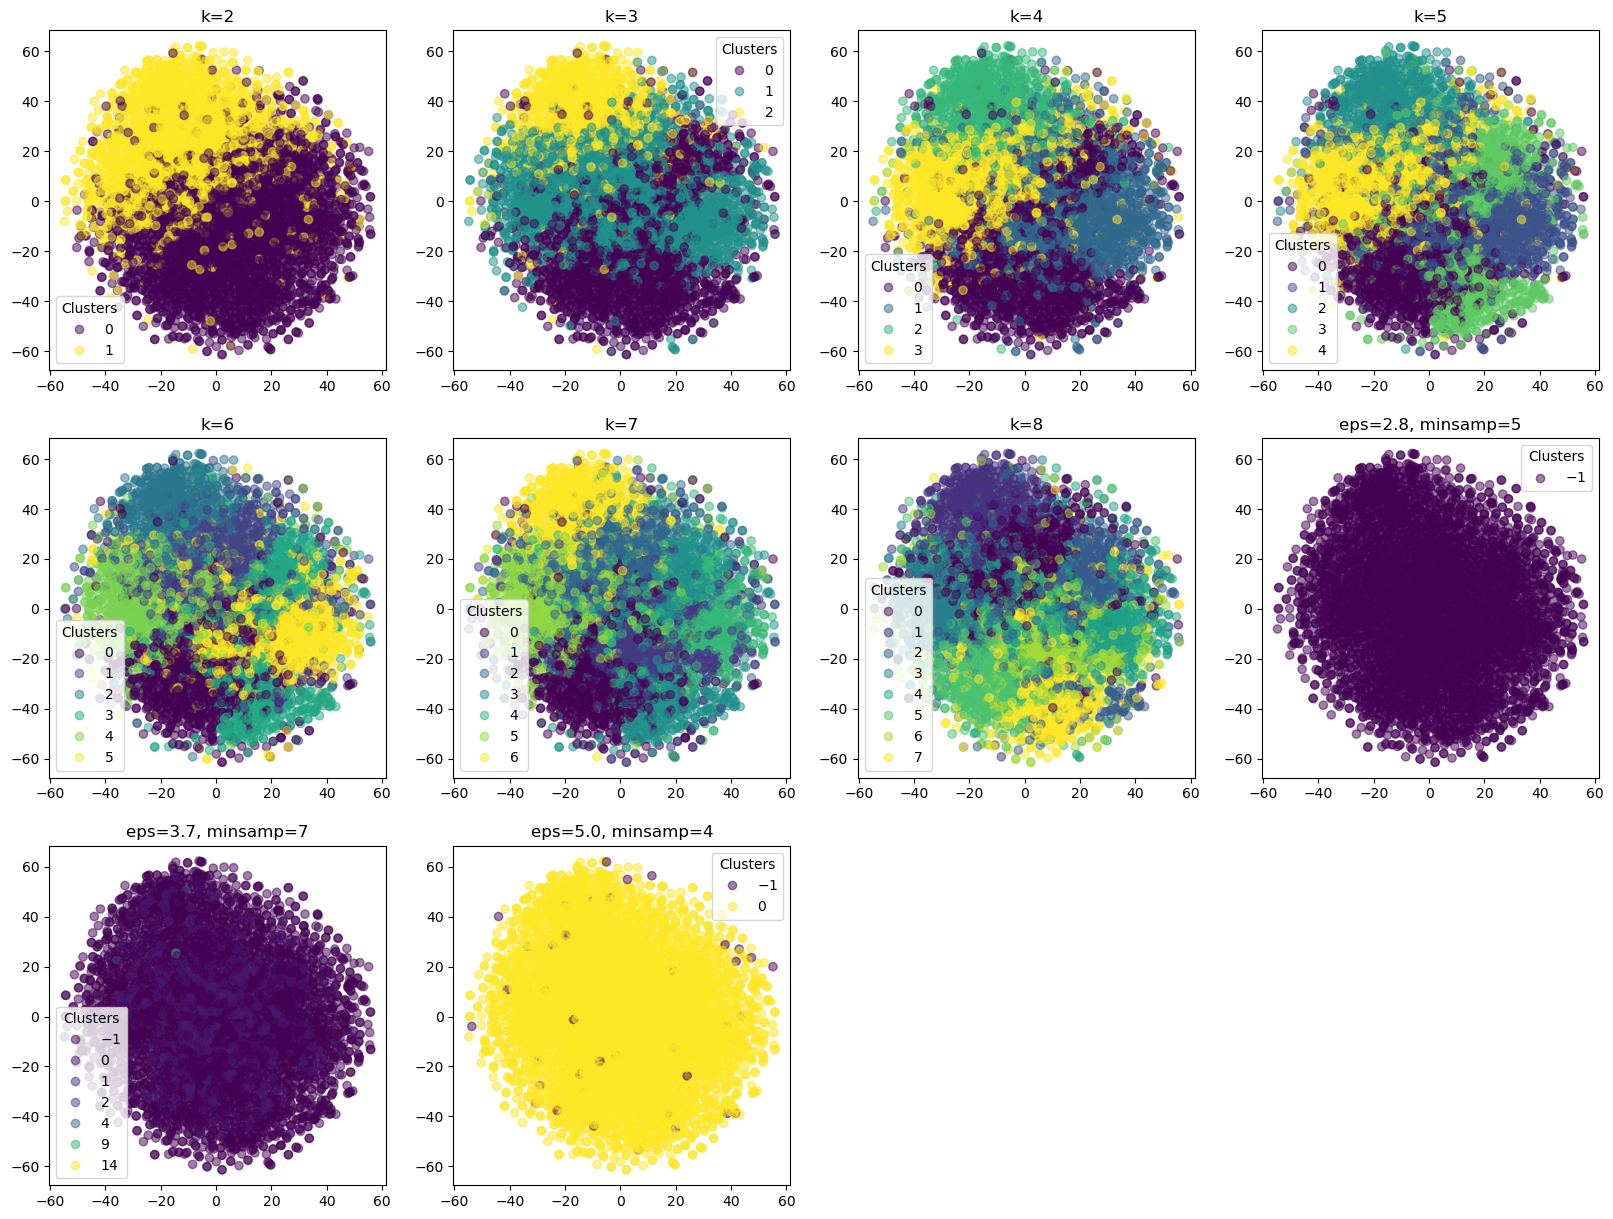

In [264]:
plot_clusters(
    df_scaled, 
    (kmeans_labels + dbscan_labels),
    model_names=(kmeans_names+dbscan_names)
)